# KaBOB-MOPs

## KaBOB Interface Test

KaBOBInterface is used to mopify and parse KaBOB triples. OpenKaBOB opens a connection to KaBOB and closes it using a `with` statement

In [3]:
from KaBOB_Interface import KaBOBInterface, OpenKaBOB
import KaBOB_Constants
import networkx as nx
import pickle

In [1]:
with OpenKaBOB("KaBOB_credentials.txt") as kabob:
    print('Triples in KaBOB:', kabob.size())

DEBUG:OpenKaBOB:Connecting to AllegroGraph server --host:'amc-tantor.ucdenver.pvt' port:10037
DEBUG:OpenKaBOB:Closed kabob_prod_feb2018


Triples in KaBOB: 283830446


### Basic Querying

#### Without using the interface (using just agraph_python)

In [4]:
from KaBOB_Interface import OpenKaBOB

p53 = kabob.createURI("http://purl.obolibrary.org/obo/PR_P04637")
label = kabob.createURI("http://www.w3.org/2000/01/rdf-schema#label")

with OpenKaBOB() as kabob:
    print('Triples in KaBOB:', kabob.size())
    
    print('Label for p53')
    p53_labels = kabob.getStatements(p53, label).asList()
    p53_label = p53_labels[0].getObject()
    print("\t%s" % p53_label)
    
    print()
    
    print('Triples with p53 as the subject')
    p53_as_subject = kabob.getStatements(p53, None, None)
    with p53_as_subject:
        p53_as_subject.enableDuplicateFilter()  # This may or may not be necessary all the time
        for statement in p53_as_subject:
            object_labels = kabob.getStatements(statement.getObject(), label).asList()
            
            if object_labels:
                print("\t%s %s %s" % (p53_label, statement.getPredicate().getLocalName(), object_labels[0].getObject()))
    
    print()
    
    print('Triples with p53 as the object')
    p53_as_object = kabob.getStatements(None, None, p53)
    with p53_as_object:
        p53_as_object.enableDuplicateFilter()
        for statement in p53_as_object:
            subject_labels = kabob.getStatements(statement.getSubject(), label).asList()
            
            if subject_labels:
                print("\t%s %s %s" % (p53_label, statement.getPredicate().getLocalName(), subject_labels[0].getObject()))


DEBUG:OpenKaBOB:Connecting to AllegroGraph server --host:'amc-tantor.ucdenver.pvt' port:10037


Triples in KaBOB: 283830446
Label for p53
	"cellular tumor antigen p53 (human)"

Triples with p53 as the subject
	"cellular tumor antigen p53 (human)" subClassOf "cellular tumor antigen p53"
	"cellular tumor antigen p53 (human)" subClassOf "Homo sapiens protein"

Triples with p53 as the object
	"cellular tumor antigen p53 (human)" subClassOf "cellular tumor antigen p53 isoform 1 (human)"
	"cellular tumor antigen p53 (human)" annotatedSource "PR:P04637 located_in GO:0005654"
	"cellular tumor antigen p53 (human)" subClassOf "cellular tumor antigen p53 phosphorylated 15 (human)"
	"cellular tumor antigen p53 (human)" subClassOf "cellular tumor antigen p53 phosphorylated 14 (human)"
	"cellular tumor antigen p53 (human)" subClassOf "cellular tumor antigen p53 dimethylated 3 (human)"
	"cellular tumor antigen p53 (human)" subClassOf "cellular tumor antigen p53 phosphorylated 16 (human)"
	"cellular tumor antigen p53 (human)" subClassOf "cellular tumor antigen p53 phosphorylated 1 (human)"
	"cel

DEBUG:OpenKaBOB:Closed kabob_prod_feb2018



	"cellular tumor antigen p53 (human)" subClassOf "cellular tumor antigen p53 ubiquitinated form (human)"
	"cellular tumor antigen p53 (human)" subClassOf "cellular tumor antigen p53 phosphorylated 18 (human)"
	"cellular tumor antigen p53 (human)" subClassOf "cellular tumor antigen p53 phosphorylated 4 (human)"


#### With the interface

In [2]:
from KaBOB_Interface import KaBOBInterface, OpenKaBOB

p53 = "obo:PR_P04637"

with OpenKaBOB("KaBOB_credentials.txt") as kabob:
    interface = KaBOBInterface(kabob)
    
    print('Label for p53')
    p53_label = interface.node_print_name(p53)
    print("\t%s" % p53_label)
    
    print()
    
    print('Triples with p53 as the subject')
    for statement in interface.agraph_get_statements(s=p53):
        object_label = interface.node_print_name(statement.getObject())
        predicate_label = interface.node_print_name(statement.getPredicate())
        print("\t%s %s %s" % (p53_label, predicate_label, object_label))
    
    print()
    
    print('Triples with p53 as the object')
    for statement in interface.agraph_get_statements(o=p53):
        subject_label = interface.node_print_name(statement.getSubject())
        predicate_label = interface.node_print_name(statement.getPredicate())
        print("\t%s %s %s" % (subject_label, predicate_label, p53_label))

DEBUG:OpenKaBOB:Connecting to AllegroGraph server --host:'amc-tantor.ucdenver.pvt' port:10037


Label for p53
	cellular tumor antigen p53 (human)

Triples with p53 as the subject
	cellular tumor antigen p53 (human) database_cross_reference "UniProtKB:P04637"
	cellular tumor antigen p53 (human) database_cross_reference "Reactome:R-HSA-69488"
	cellular tumor antigen p53 (human) id "PR:P04637"
	cellular tumor antigen p53 (human) has_obo_namespace "protein"
	cellular tumor antigen p53 (human) definition "A cellular tumor antigen p53 that is encoded in the genome of human."
	cellular tumor antigen p53 (human) label "cellular tumor antigen p53 (human)"
	cellular tumor antigen p53 (human) comment "Category=organism-gene."
	cellular tumor antigen p53 (human) subClassOf cellular tumor antigen p53
	cellular tumor antigen p53 (human) subClassOf Homo sapiens protein
	cellular tumor antigen p53 (human) subClassOf pr_genid1776552
	cellular tumor antigen p53 (human) subClassOf pr_genid338241
	cellular tumor antigen p53 (human) equivalentClass pr_genid338237
	cellular tumor antigen p53 (human) t

DEBUG:OpenKaBOB:Closed kabob_prod_feb2018


	cellular tumor antigen p53 phosphorylated 4 (human) subClassOf cellular tumor antigen p53 (human)


### Mopification

In [1]:
p53 = "obo:PR_P04637"

with OpenKaBOB("KaBOB_credentials.txt") as kabob:
    interface = KaBOBInterface(kabob)
    bio_p53 = interface.bio(interface.create_uri(p53))
    interface.mopify(bio_p53)
        
#     interface.draw(layout=nx.circular_layout)

DEBUG:OpenKaBOB:Connecting to AllegroGraph server --host:'amc-tantor.ucdenver.pvt' port:10037
DEBUG:KaBOBInterface:> cellular tumor antigen p53 (human)
DEBUG:KaBOBInterface:	> cellular tumor antigen p53
DEBUG:KaBOBInterface:		> protein
DEBUG:KaBOBInterface:			> biopolymer
DEBUG:KaBOBInterface:				> interactor type
DEBUG:KaBOBInterface:				< interactor type
DEBUG:KaBOBInterface:			< biopolymer
DEBUG:KaBOBInterface:			> amino acid chain
DEBUG:KaBOBInterface:				> molecular entity
DEBUG:KaBOBInterface:					> chemical entity
DEBUG:KaBOBInterface:						> object
DEBUG:KaBOBInterface:							> material entity
DEBUG:KaBOBInterface:								> independent continuant
DEBUG:KaBOBInterface:									> continuant
DEBUG:KaBOBInterface:										> entity
DEBUG:KaBOBInterface:										< entity
DEBUG:KaBOBInterface:										> occurrent
DEBUG:KaBOBInterface:										< occurrent
DEBUG:KaBOBInterface:									< continuant
DEBUG:KaBOBInterface:									> specifically dependent continuant
DEBUG:KaBOBInterfac

DEBUG:KaBOBInterface:																														< kingdom
DEBUG:KaBOBInterface:																													< Fungi
DEBUG:KaBOBInterface:																												< Metazoa
DEBUG:KaBOBInterface:																											< Eumetazoa
DEBUG:KaBOBInterface:																											> Cnidaria
DEBUG:KaBOBInterface:																												> phylum
DEBUG:KaBOBInterface:																												< phylum
DEBUG:KaBOBInterface:																											< Cnidaria
DEBUG:KaBOBInterface:																										< Bilateria
DEBUG:KaBOBInterface:																										> Platyhelminthes
DEBUG:KaBOBInterface:																										< Platyhelminthes
DEBUG:KaBOBInterface:																									< Deuterostomia
DEBUG:KaBOBInterface:																								< Chordata
DEBUG:KaBOBInterface:																								> subphylum
DEBUG:KaBOBInterface:																								< subphylum
DEBUG:KaBOBInterface:																							< Craniata <chordata>
DEBUG:KaBOBInterface:																				

Number of nodes in Bio World

In [6]:
k = OpenKaBOB("KaBOB_credentials.txt")
k.connect_to_kabob()
kabob = k.kabob
interface = pickle.load(open("pickles/interface_30.pickle", "rb"))
interface.kabob = kabob
# interface = KaBOBInterface(kabob)
# print(len(interface.get_bio_world()))

DEBUG:OpenKaBOB:Connecting to AllegroGraph server --host:'amc-tantor.ucdenver.pvt' port:10037


In [4]:
interface.mopify_bio_world(num_nodes=30)

In [ ]:
interface.draw(layout=nx.fruchterman_reingold_layout, size=900)

['male-person', 'person', 'animate-thing', 'thing']


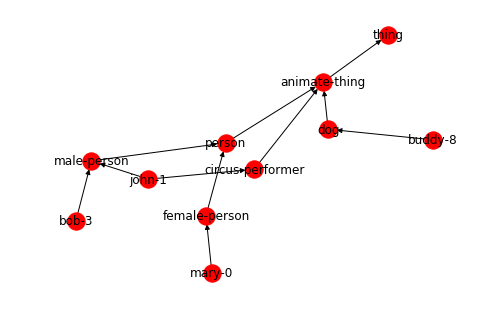

In [1]:
%matplotlib inline
import matplotlib as plt
import networkx as nx
from MOPs import MOPsManager


manager = MOPsManager()

manager.add_mop("thing")
manager.add_mop("animate-thing", abstractions=["thing"])
manager.add_mop("person", abstractions=["animate-thing"])
manager.add_mop("dog", abstractions=["animate-thing"])
manager.add_mop("male-person", abstractions=["person"])
manager.add_mop("female-person", abstractions=["person"])
manager.add_mop("circus-performer", abstractions=["animate-thing"])

manager.add_instance("john-1", abstractions=["male-person", "circus-performer"])
manager.add_instance("bob-3", abstractions=["male-person"])
manager.add_instance("mary-0", abstractions=["female-person"])
manager.add_instance("buddy-8", abstractions=["dog"])
manager.add_mop("thing")

pos = nx.spring_layout(manager.abstraction_hierarchy, k=3)
nx.draw(manager.abstraction_hierarchy, with_labels=True)



In [15]:
BP_root = "obo:GO_0008150"
MF_root = "obo:GO_0003674"
CC_root = "obo:GO_0005575"
PRO_root = "obo:PR_000000001"
localization_process = "obo:GO_0051179"
binding_process = "obo:GO_0005488"
interaction = "obo:MI_0000"
physical_association = "obo:MI_0915"
apoptotic_process = "obo:GO_0006915"
p53 = "obo:PR_P04637"
cytochrome_C = "obo:PR_P08574"